# Analysis 5:
- take only full time 
- take the top state 
- sort with 
- find mean values for the wages
- (optional) does not make sense.check if value less than mean of the same position. check if certified or certified/withdrawn. take the ratio. if high then one of the likely reasons why it could have got certified
- 

In [1]:
import pandas as pd
import numpy as np
import os
import datetime

/Users/kvs25/anaconda3/lib/python3.5/site-packages/numexpr/cpuinfo.py:53: UserWarning: [Errno 2] No such file or directory: 'arch'
  stacklevel=stacklevel + 1)
/Users/kvs25/anaconda3/lib/python3.5/site-packages/numexpr/cpuinfo.py:53: UserWarning: [Errno 2] No such file or directory: 'machine'
  stacklevel=stacklevel + 1)
/Users/kvs25/anaconda3/lib/python3.5/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory: 'sysctl'
  stacklevel=stacklevel + 1):


In [2]:
df = pd.read_csv('data/H1B_petition_dataset.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,ANN ARBOR,MICHIGAN,-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,PLANO,TEXAS,-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,JERSEY CITY,NEWJERSEY,-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,DENVER,COLORADO,-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,ST. LOUIS,MISSOURI,-90.199404,38.627003


In [4]:
data=df[df.FULL_TIME_POSITION=='Y']

In [5]:
data.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,PLANO,TEXAS,-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,JERSEY CITY,NEWJERSEY,-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,DENVER,COLORADO,-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,ST. LOUIS,MISSOURI,-90.199404,38.627003
5,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016,MIAMI,FLORIDA,-80.191790,25.761680


In [7]:
data.groupby('STATE')[['CASE_STATUS']].count().sort_values(by=['CASE_STATUS'],ascending=False).head()

,CASE_STATUS
STATE,
CALIFORNIA,81586
NEWYORK,28263
TEXAS,25390
NEWJERSEY,19245
WASHINGTON,16002


In [9]:
new_data=data[data.STATE=='CALIFORNIA']

In [27]:
new_data= new_data.reset_index(drop=True)
new_data.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
0,CERTIFIED-WITHDRAWN,"GLOBO MOBILE TECHNOLOGIES, INC.",CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.0,2016,SAN JOSE,CALIFORNIA,-121.886329,37.338208
1,CERTIFIED-WITHDRAWN,WESTFIELD CORPORATION,CHIEF EXECUTIVES,"GENERAL MANAGER, OPERATIONS",Y,164050.0,2016,LOS ANGELES,CALIFORNIA,-118.243685,34.052234
2,CERTIFIED,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,Y,187200.0,2016,SANTA CLARA,CALIFORNIA,-121.955236,37.354108
3,CERTIFIED-WITHDRAWN,"CUDDLE BARN, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER (COO),Y,117998.0,2016,COMMERCE,CALIFORNIA,-118.159793,34.000569
4,CERTIFIED-WITHDRAWN,WESTFIELD CORPORATION,CHIEF EXECUTIVES,"GENERAL MANAGER, OPERATIONS",Y,164050.0,2016,LOS ANGELES,CALIFORNIA,-118.243685,34.052234


In [28]:
output=new_data.groupby(['WORKSITE','SOC_NAME'],as_index=False)[['PREVAILING_WAGE']].mean()

In [31]:
output.head()

,WORKSITE,SOC_NAME,PREVAILING_WAGE
0,#29G,"SOFTWARE DEVELOPERS, APPLICATIONS",138362.0
1,&NBSP;PLEASANTON,"SOFTWARE DEVELOPERS, APPLICATIONS",100360.0
2,210A NEWARK,"SOFTWARE DEVELOPERS, APPLICATIONS",79498.0
3,7707 AUSTIN RD.,PSYCHIATRISTS,237864.0
4,ADDISON,"COMPUTER OCCUPATIONS, ALL OTHER",97698.0


In [38]:
data.groupby('JOB_TITLE')[['JOB_TITLE']].count().sort_values(by=['JOB_TITLE'],ascending=False).head()

,JOB_TITLE
JOB_TITLE,
SOFTWARE ENGINEER,19423
PROGRAMMER ANALYST,9308
SENIOR SOFTWARE ENGINEER,5748
SOFTWARE DEVELOPER,5295
TECHNOLOGY LEAD - US,4173


In [6]:
#TRYING SOME OTHER ANALYSIS


In [16]:
new_data=data[data.JOB_TITLE=='SOFTWARE ENGINEER']

In [17]:
new_data.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
89,DENIED,1 HEMA,SOFTWARE DEVELOPERS APPLICATIONS,SOFTWARE ENGINEER,Y,72000.0,2016,NEW YORK,NEWYORK,-74.005941,40.712784
491,DENIED,"3E CONSULTING, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",SOFTWARE ENGINEER,Y,72946.0,2016,PLANTATION,FLORIDA,-80.233104,26.127586
1618,DENIED,A.J. BOGGS & COMPANY,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",SOFTWARE ENGINEER,Y,92352.0,2016,LANSING,MICHIGAN,-84.555535,42.732535
9156,CERTIFIED-WITHDRAWN,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,154440.0,2016,MOUNTAIN VIEW,CALIFORNIA,-122.083851,37.386052
9162,CERTIFIED,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,154440.0,2016,MOUNTAIN VIEW,CALIFORNIA,-122.083851,37.386052


In [26]:
result=new_data.groupby('STATE')[['CASE_STATUS']].count().sort_values(by=['CASE_STATUS'],ascending=False)

In [29]:
result.head()

,STATE,CASE_STATUS
0,CALIFORNIA,9530
1,WASHINGTON,2392
2,NEWYORK,1385
3,MASSACHUSETTS,943
4,TEXAS,651


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
result=result.reset_index(level=0, drop=False)

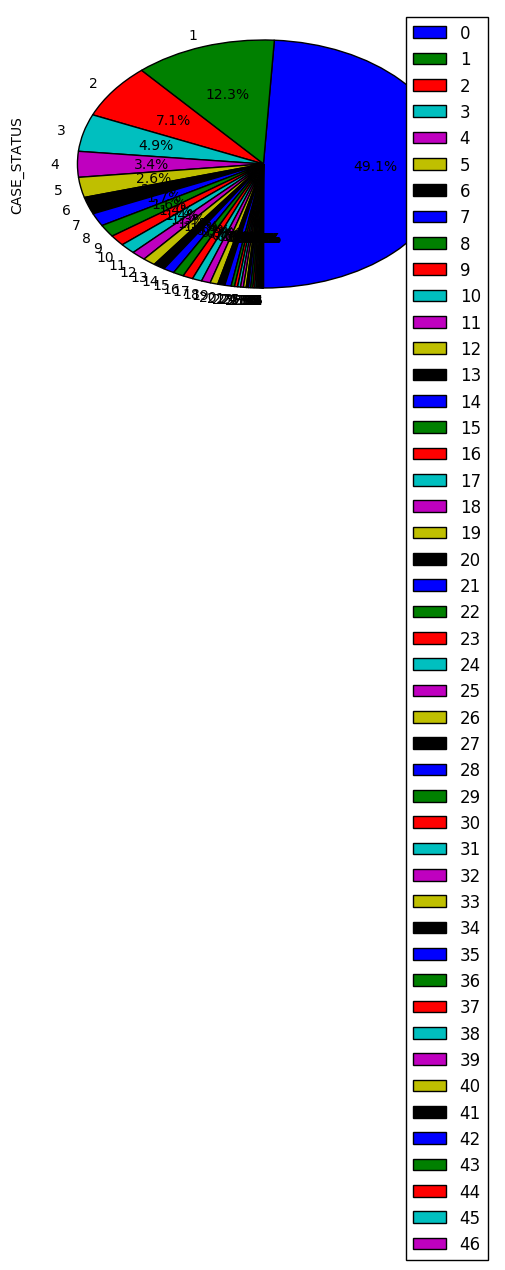

In [35]:
result.plot(x='STATE',y='CASE_STATUS',kind='pie',autopct='%1.1f%%', startangle=270)
plt.show()

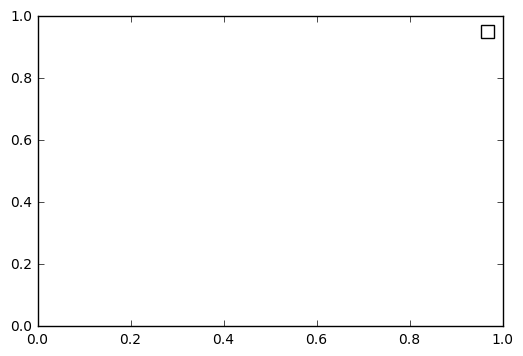

In [36]:
plt.legend(labels=result.index, loc="best")